<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Espa%C3%A7os_produtointerno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Álgebra Linear**

José Claudinei Ferreira

Universidade Federal de Alfenas

#**Espaços vetorias com produto interno**





[Link](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/Espa%C3%A7os_vetoriais.ipynb) para conteúdos anteriores.

#**Produto escalar e norma de vetores em $\mathbb{R}^n$**

Já vimos, quando falamos de alguns detalhes sobre produto de matrizes, que 
 $$\sum_{k=1}^nc_{i}d_{j}=\begin{bmatrix}c_{1}&c_{2}&\cdots&c_{n}\end{bmatrix}\begin{bmatrix}d_{1}\\d_{2}\\\vdots&\\d_{n}\end{bmatrix}=\begin{bmatrix}d_{1}&d_{2}&\cdots&d_{n}\end{bmatrix}\begin{bmatrix}c_{1}\\c_{2}\\\vdots&\\c_{n}\end{bmatrix}=c\cdot d$$ é o [produto escalar entre os vetores $c,\,d\in\mathbb{R}^n$](https://pt.wikipedia.org/wiki/Produto_escalar).

 Lembramos agora que 
 $$\|u\|=\sqrt{u_1^2+u_2^2+\cdots+u_8^2}=\sqrt{u\cdot u},$$ é a norma usual (ou o módulo) do vetor $u\in\mathbb{R}^n$.

 Segue que $$-1\leq\frac{u\cdot v}{\|u\|\|v\|}\leq 1$$ e dizemos que $$\frac{u\cdot v}{\|u\|\|v\|}=\cos(\alpha),$$ em que $\alpha$ é o ângulo entre os vetores $u$ e $v$.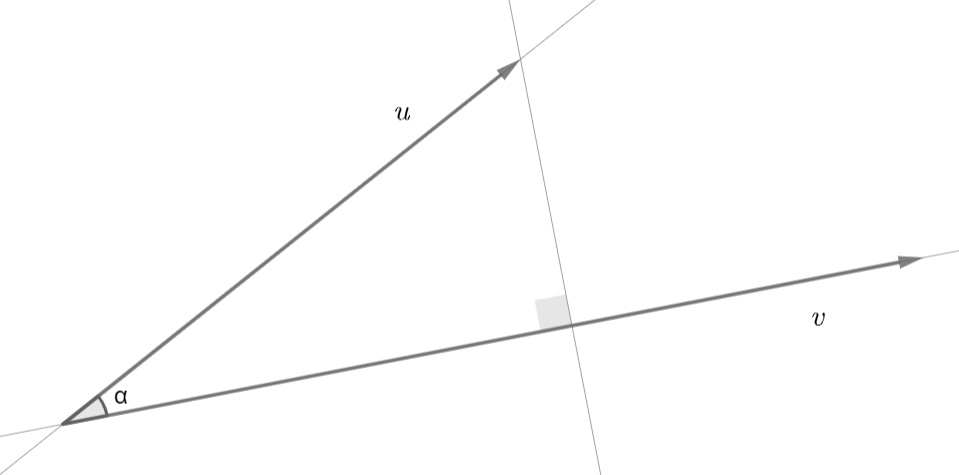

Segue disso que o vetor $$w=Proj_vu=\|u\|\cos(\alpha)\left(\frac{v}{\|v\|}\right)$$ é a [projeção ortogonal](https://pt.wikipedia.org/wiki/Proje%C3%A7%C3%A3o_de_um_vetor) de $u$ sobre $v$. 

Simplificando a última expressão temos $$w=Proj_vu=\left(\frac{u\cdot v}{\|v\|^2}\right)v.$$

Segue que o vetor $$n=u-Proj_vu=u-\left(\frac{u\cdot v}{\|v\|^2}\right)v$$ é perpendicular (ortogonal ou normal) a $v$. 

Em particular, $$u=\beta v+n=w+n$$ de forma única, em que $$w\cdot n=\left(\left(\frac{u\cdot v}{\|v\|^2}\right)v\right)\cdot\left(u-\left(\frac{u\cdot v}{\|v\|^2}\right)v\right)=\left(\frac{u\cdot v}{\|v\|^2}\right)\left(u\cdot v-\left(\frac{u\cdot v}{\|v\|^2}\right)v\cdot v\right)=0$$ 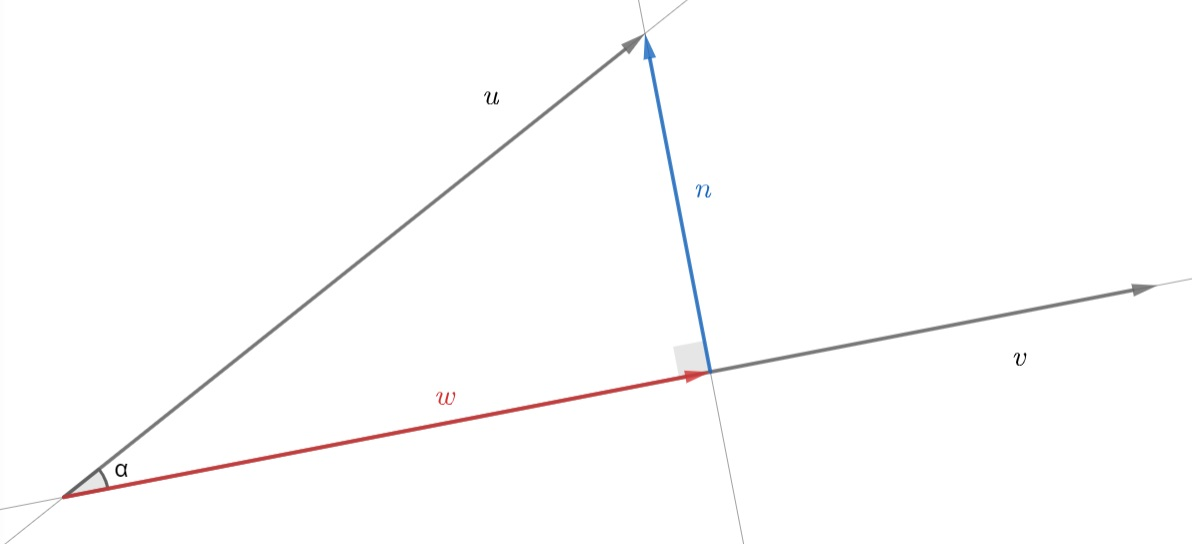

#**Um problema para pensarmos:**

Sejam $u=(1,3,5)$, $v=(1,2,3)$ e $w=(1,4,6)$.

Escreva $w$ como combinação linear de $u$ e $v$ e alguma outra coisa. <font color=blue> Aqui entende-se que o sistema linear $$\alpha u+\beta v=w$$ não tem solução, porque o conjunto $\{u,\,v,\,w\}$ é L.I.

Vejamos, por eliminação se o conjunto $\{u,v,w\}$ é mesmo L.I. Vamos escrever a matriz $M$, cujas linhas são $u$, $v$ e $w$.

In [1]:
import numpy as np    # Pacote para usar Álgebra Linear

u,v,w=np.array([1,3,5]), np.array([1,2,3]), np.array([1,4,5])
M=np.array([u,v,w])

M

array([[1, 3, 5],
       [1, 2, 3],
       [1, 4, 5]])

Ssubtraindo $u$ de $v$ e de $w$ temos a matriz $M_1$:

In [2]:
M1=np.array([u,v-u,w-u])

M1

array([[ 1,  3,  5],
       [ 0, -1, -2],
       [ 0,  1,  0]])

Isso já nos dá uma matriz escalonada; e que a terceira coluna não pode ser escrita como soma das duas primeiras.

Ou seja, $\{u,v,w\}$ é mesmo L.I.

E esse conjunto é ortogonal?

In [3]:
uv=np.dot(u,v)     # np.dot(u,v) calcula o produto escalar entre u e v.
uv

22

<font color=blue> Não, porque $u\cdot v=22\neq 0$.

Se quiser, pode mudar o nome da função np.dot(), como, por exemplo:

In [4]:
def f(u,v):                   # Mudando o nome de np.dot() para f().
  return np.dot(u,v)

Para calcular $u\cdot v$ basta digitar agora $f(u,v)$

In [5]:
f(u,v)

22

Podemos descobrir o ângulo entre esses dois vetores.

In [6]:
theta=np.arccos(f(u,v)/np.sqrt(f(u,u)*f(v,v)))  # Função arco cosseno. Retorno em radianos.
theta*180/np.pi                                 # Converter para graus.

6.353170919214773

Vejamos esses vetores geometricamente;

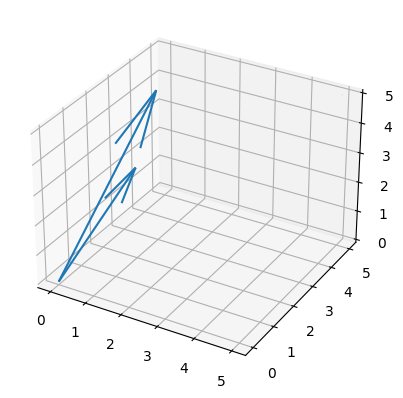

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().add_subplot(projection='3d')

# Make the direction data for the arrows
ax.quiver([0,5],[0,5],[0,5],[0,0.001],[0,0.001],[0,0.001],color='gray') # Criar eixos.
ax.quiver([0,0],[0,0],[0,0],[1,1],[3,2],[5,3],length=1)                          # Plotar vetores.

plt.show()

**<font color=blue> Uma solução para o problema:**

Vamos resolver o problema da seguinte forma. Tomamos $n_1=u$ e depois escrevemos
$$v=\alpha_{12} n_1+n_2,\qquad n_2\cdot n_1=0.$$ 

<font color=blue> Vamos tirar de $v$ a perte que ele tem de $n_1=u$.

Isso dá certo se tomarmos $$\alpha_{12}=\frac{n_1\cdot v}{\|n_1\|^2}.$$ 

Agora, tome $$w=\alpha_{13} n_1+\alpha_{23}n_2+n_3,\qquad n_3\cdot n_1=0,\qquad n_3\cdot n_2=0.$$ 

<font color=blue> Vamos tirar de $w$ a perte que ele tem de $n_1=u$ e de $n_2$. Estamos tirando então as partes que $w$ tem de $u$ e de $v$.

Isso dá certo se tomarmos $$\alpha_{13}=\frac{n_1\cdot w}{\|n_1\|^2},\qquad \alpha_{23}=\frac{n_2\cdot w}{\|n_2\|^2}.$$ 

Note que estamos escrevendo 
$$w=a u+bv+\text{alguma coisa},\tag{1}$$ que no caso a coisa é $n_3$.

Vamos precisar determinar $\alpha_{ij}$, como dado anteriormente:

In [8]:
n1=u.copy()           # Cópias de u, v e w, para não alterá-los nos cálculos.
n2=v.copy()
n3=w.copy()

uv=np.dot(u,v)
uw=np.dot(u,w)
uu=np.dot(u,u)
vv=np.dot(v,v)
wv=np.dot(v,w)
r12=uv/uu
r13=uw/uu
n2=n2-r12*n1
n2n2=np.dot(n2,n2)
r23=np.dot(w,n2)/n2n2
n3=n3-r13*n1-r23*n2
print('u.v,u.u,v.v, u.w,w.v,n2.n2=',uv,uu,vv,uw,wv,n2n2)
print(f'Vetores n1, n2 e n3=\n',n1,n2,n3)

u.v,u.u,v.v, u.w,w.v,n2.n2= 22 35 14 38 24 0.17142857142857143
Vetores n1, n2 e n3=
 [1 3 5] [ 0.37142857  0.11428571 -0.14285714] [-0.33333333  0.66666667 -0.33333333]


Seque que combinação linear acima é equivalente a  
$$\alpha_{13}n_1+\alpha_{23}n_2+n_3=av+bv+n_3=w,\tag{1*}$$ e que o erro de aproximação de $$av+bv\approx w \tag{2}$$ é $n_3$. 


Ou seja,
$$\alpha_{13}n_1+\alpha_{23}n_2= au+bv=an_1+b(\alpha_{12}n_1+n_2),$$ que é equivalente a 
$$\alpha_{13}n_1+\alpha_{23}n_2= (a+b\alpha_{12})n_1+bn_2,$$ ou 
$$\begin{bmatrix}1&\frac{v\cdot n_1}{\|n_1\|^2}\\0&1\end{bmatrix}\begin{bmatrix}a\\b\end{bmatrix}=\begin{bmatrix}\displaystyle\frac{w\cdot n_1}{\|n_1\|^2}\\\\\displaystyle\frac{w\cdot n_2}{\|n_2\|^2}\end{bmatrix}.$$

In [9]:
b=r23
a=r13-r12*b
print('a,b=',a,b)

a,b= 0.6666666666666647 0.6666666666666695


Ou melhor $a=2/3$ e $b=2/3$.

Testando, com $w-au-bv$ obtemos o vetor $n_3$:

In [10]:
print('Erro na aproximação de w como combinação linear de u e v')
w-a*u-b*v


Erro na aproximação de w como combinação linear de u e v


array([-0.33333333,  0.66666667, -0.33333333])

**Obs:** Quando determinamos os vetores $n_2$ e $n_3$ fizemos uma decomposição da matriz $M^t$ como um produto $M^t=GS$, em que as colunas de $G$ são ortogonais e a matriz $S$ é triangular superior, com 1 em cada elemento da diagonal.

In [11]:
S=np.array([[1,r12,r13],[0,1,r23],[0,0,1]])
G=np.transpose(np.array([n1,n2,n3]))
print('G=[n1 n2 n3]')
print(G)
print()
print('S=')
print(S)
print()
print('GS=')
print(G@S)

G=[n1 n2 n3]
[[ 1.          0.37142857 -0.33333333]
 [ 3.          0.11428571  0.66666667]
 [ 5.         -0.14285714 -0.33333333]]

S=
[[1.         0.62857143 1.08571429]
 [0.         1.         0.66666667]
 [0.         0.         1.        ]]

GS=
[[1. 1. 1.]
 [3. 2. 4.]
 [5. 3. 5.]]


**Obs:** O conjunto $\{n_1,n_2,n_3\}$ é ortogonal, ou seja, seus vetores são dois a dois ortogonais.

In [12]:
np.dot(n1,n2),np.dot(n1,n3),np.dot(n2,n3)

(4.440892098500626e-16, 2.886579864025407e-15, -5.551115123125783e-16)

#**Produto interno e norma (ou módulo) de vetores**

Já tivemos uma seção em que falamos do produto escalar entre vetores de $\mathbb{R^n}$. Agora vamos tratar do conceito de [produto interno](https://pt.wikipedia.org/wiki/Produto_interno), que é uma generalização dessa ideia de produto entre vetores, que resulta em um número ou escalar.

<font color=green> É importante destacar que o que queremos é um conceito semelhante ao produto escalar, que permita darmos importância diferente para as coordenadas de um vetor (em determinada base). Na verdade queremos outras formas de medir distâncias e ângulos entre vetores.

<font color=blue> Seja $V$ um espaço veorial. O produto interno entre dois vetores $u,\,v,\in V$ é uma função $f(u,v)\in \mathbb{R}$ (poderia ser um número complexo também, mas vamos falar disso só quando precisar). Exigimos que essa função $f:\,V\times V \to \mathbb{R}$ tenha quatro propriedades:
1.   $f(u,v)=f(v,u)$ (comutativa);
2.   $f(u+\alpha v,w)=f(u,w)+\alpha f(v,w)$ (linearidade, em cada coordenada);
3.   $f(u,u)>0$, se $u$ não for o vetor nulo, e $f(u,u)=0$, se $u=0$ (positividade definida).



#**Exemplos:**

 **Exemplo 1**:
 
 O exemplo mais simples de produto interno é o produto escalar $$\sum_{k=1}^nc_{i}d_{j}=\begin{bmatrix}c_{1}&c_{2}&\cdots&c_{n}\end{bmatrix}\begin{bmatrix}d_{1}\\d_{2}\\\vdots&\\d_{n}\end{bmatrix}=\begin{bmatrix}d_{1}&d_{2}&\cdots&d_{n}\end{bmatrix}\begin{bmatrix}c_{1}\\c_{2}\\\vdots&\\c_{n}\end{bmatrix}=c\cdot d.$$ 

 **Exemplo 2:** *Um exempo de produto interno em um espaço vetorial de dimensão finita:*
 
Considere um conjunto $C=\{v_1,\,v_2,\,\ldots,v_n\}\subset V$, linearmente independente, em que $(V,\oplus,\odot)$ é um espaço vetorial.

Seja $W=[C]$ o espaço gerado por $C$, dentro de $V$, ou seja, $C$ é uma base de $W$.

Então, cada elemento $w\in W$ é da forma 
$$w=\alpha_1\odot v_1\oplus\alpha_2\odot v_2\oplus\cdots\oplus\alpha_n\odot v_n.$$

Podemos então idenificar cada elemento $w\in W$ com a sua representação na base $C$ ([seu avatar](https://www.dicionarioinformal.com.br/avatar/)) $\alpha=(\alpha_1,\,\alpha_2,\ldots,\,\alpha_n)\in \mathbb{R}^n$


Então o exemplo mais simples de produto interno $f(u,v)$, entre dois vetores $u,\,v\in W$, em que $$u=c_1\odot v_1\oplus c_2\odot v_2\oplus\cdots\oplus c_n\odot v_n,\qquad v=d_1\odot v_1\oplus d_2\odot v_2\oplus\cdots\oplus d_n\odot v_n$$ é o produto escalar $$f(u,v)=c\cdot d=\sum_{k=1}^nc_{i}d_{j}=\begin{bmatrix}c_{1}&c_{2}&\cdots&c_{n}\end{bmatrix}\begin{bmatrix}d_{1}\\d_{2}\\\vdots&\\d_{n}\end{bmatrix}=\begin{bmatrix}d_{1}&d_{2}&\cdots&d_{n}\end{bmatrix}\begin{bmatrix}c_{1}\\c_{2}\\\vdots&\\c_{n}\end{bmatrix},$$ entre seus avatares $c,\,d\in \mathbb{R}^n$.

**Exemplo 3.** Seja $V=\mathbb{R}^3$, com as operações usuais. Defina 
$$g(u,v)=\begin{bmatrix}u_1&u_2&u_3\end{bmatrix}\begin{bmatrix}4&1&0\\1&3&0\\0&0&2\end{bmatrix}\begin{bmatrix}v_1\\v_2\\u_3\end{bmatrix}.$$

Você pode checar que $g(u,v)=g(v,u)$ e que $g(u+\alpha v,w)=g(u,w)+\alpha g(v,w)$, usando as propriedades de produto de matrizes ou de números reais.

Por outro lado, se $u=(x,y,z)$, então 
$$\begin{cases}g(u,u)&=&4x^2+2xy+3y^2+2z^2\\&=&3x^2+2y^2+2z^2+(x^2+2xy+y^2)\\&=&3x^2+2y^2+2z^2+(x+y)^2\\&\geq &0\end{cases}.$$

Ainda, se $g(u,u)=0$. Teremos $x=y=z=0$, ou que $u=(0,0,0)$.

Considerando os vetores $u$, $v$ e $w$ do exemplo anterior.

In [13]:
u,v,w

(array([1, 3, 5]), array([1, 2, 3]), array([1, 4, 5]))

E redefinindo o produto interno, agora como $g(s,t)$, para $s,\,t\in \mathbb{R}^3$ temos:

In [14]:
M=np.array([[4,1,0],[1,3,0],[0,0,2]])   # Matriz para definir produto interno.
def g(s,t):                             # Definição do produto interno
     st=np.transpose(s)                 # Transpondo vetor s.
     p=t@M@st
     return p

E podemos calcular o produto interno entre $u$ e $v$ como:

In [15]:
g(u,v)

57

Se quiser checar os cálculos acompanhe no que segue:$$g(u,v)=\begin{bmatrix}u_1&u_2&u_3\end{bmatrix}\begin{bmatrix}4&1&0\\1&3&0\\0&0&2\end{bmatrix}\begin{bmatrix}v_1\\v_2\\u_3\end{bmatrix}=\begin{bmatrix}1&3&5\end{bmatrix}\begin{bmatrix}4&1&0\\1&3&0\\0&0&2\end{bmatrix}\begin{bmatrix}1\\2\\3\end{bmatrix}=\begin{bmatrix}1&3&5\end{bmatrix}\begin{bmatrix}6\\7\\6\end{bmatrix}=6+21+30=57.$$

#**As desigulades de Cauchy-Schwarz e trinagular** 

Se $f(u,v)$ for um produto interno, definimos 
 $$\|u\|=\sqrt{f(u, u)},$$ como a norma do vetor $u\in\mathbb{R}^n$.

Tendo isso em mente podemos demonstrar as desigualdades:


1.   $|f(u,v)|^2\leq \|u\|^2\|v\|^2$ (desigualdade de Cauchy-Schwarz);
2.   $\|u+v\|\leq \|u\|+\|v\|$ (desigualdade triangular).

Para verificar isso, precisamos lembrar que uma função polinomial $p(x)=ax^2+bx+c$ não possui raiz real quando $\Delta=b^2-4ac<0$ e que possui apenas uma raiz quando $\Delta=0$.

Fixando dois vetores $u,\,v\in\mathbb{R}^n$ e tomando $$p(x)=f(u+xv,u+xv)=\|u+xv\|^2\geq 0,\qquad x\in \mathbb{R}.$$ Isso nos diz que $p(x)$ não possui duas raízes reais. 

Como, $$p(x)=f(u,u)+2f(u,v)x+f(v,v)x^2=\|u\|^2+2f(u,v)x+\|v\|^2x^2,$$ segue que $a=\|v\|^2$, $b=2f(u,v)$ e $c=\|u\|^2$ e que $$\Delta=(2f(u,v))^2-4\|u\|^2\|v\|^2\leq 0.$$ Então, 
$$(2f(u,v))^2\leq 4\|u\|^2\|v\|^2$$ e segue que $$|f(u,v)|^2\leq \|u\|^2\|v\|^2.$$

Segue também que $$-1\leq\frac{f(u,v)}{\|u\|\|v\|}\leq 1,$$ e dizemos que $$\frac{f(u,v)}{\|u\|\|v\|}=\cos(\alpha),$$ em que $\alpha$ é o "ângulo entre os vetores $u$ e $v$".

Ainda,$$\|u+v\|^2=f(u+v,u+v)=f(u,u)+2f(u,v)+f(v,v)\leq f(u,u)+2\|u\|\|v\|+f(v,v)=(\|u|+\|v\|)^2,$$ o que nos diz que $$\|u+v\|\leq \|u\|+\|v\|.$$

**Exemplo 4.** Com o produto interno do exemplo 3, e com os vetores $u$ e $v$ dados, temos agora o ângulo entre eles como:
$$\beta=arc\cos\left(\frac{g(u,v)}{\sqrt{g(u,u)g(v,v)}}\right),$$ que é um pouco maior que o calculado com o produto escalar.

In [16]:
beta=np.arccos(g(u,v)/np.sqrt(g(u,u)*g(v,v)))  # Função arco cosseno. Retorno em radianos.
beta*180/np.pi                                 # Converter para graus.

7.545092589718637

#**Projeção ortogonal**

Seja $V$ um espaço vetorial, com produto internod dado por $f(u,v)$.

Definimos o vetor $$w=Proj_vu=\|u\|\cos(\alpha)\left(\frac{v}{\|v\|}\right)$$ como a [projeção ortogonal](https://pt.wikipedia.org/wiki/Proje%C3%A7%C3%A3o_de_um_vetor) de $u$ sobre $v$. 

Simplificando a última expressão temos $$w=Proj_vu=\left(\frac{f(u,v)}{\|v\|^2}\right)v.$$

Segue que o vetor $$n=u-Proj_vu=u-\left(\frac{f(u,v)}{\|v\|^2}\right)v$$ é perpendicular (ortogonal ou normal) a $v$. 

Em particular, $$u=\beta v+n=w+n$$ de forma única, em que $$f(w, n)=f\left(\left(\frac{f(u,v)}{\|v\|^2}\right)v,u-\left(\frac{f(u,v)}{\|v\|^2}\right)v\right)=\left(\frac{f(u,v)}{\|v\|^2}\right)\left(f(u,v)-\left(\frac{f(u,v)}{\|v\|^2}\right)f(v,v)\right)=0$$ 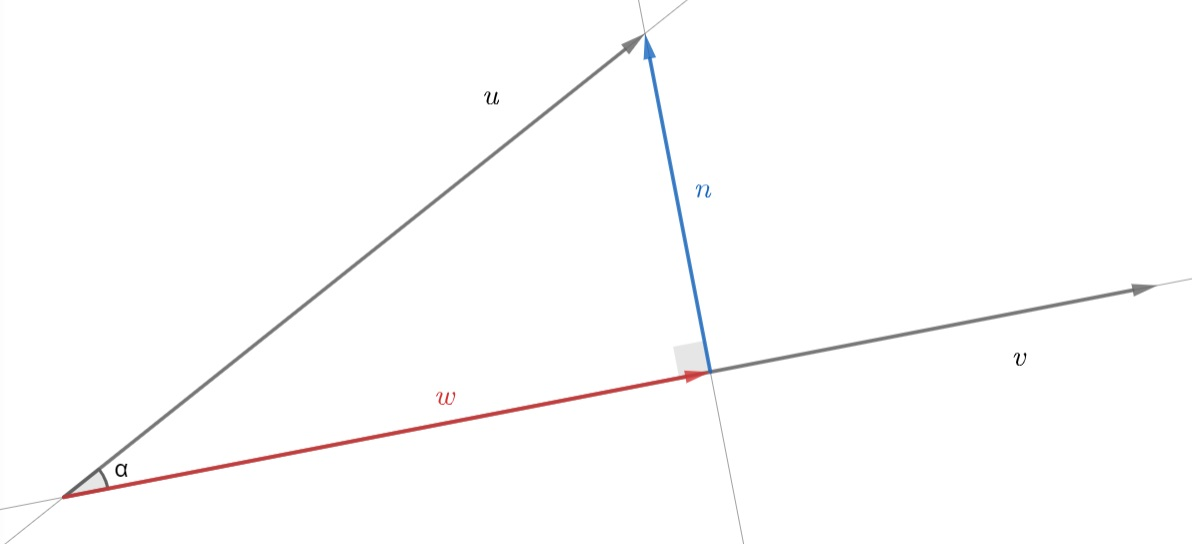


#**O processo de [ortogonalização de Gram-Schmidt](https://pt.wikipedia.org/wiki/Processo_de_Gram-Schmidt) ou [decomposição QR](https://pt.wikipedia.org/wiki/Decomposi%C3%A7%C3%A3o_QR#Usando_o_processo_de_Gram%E2%80%93Schmidt)** com produto interno qualquer.

Se repetirmos o argumento de projeção ortogonal, <font color=blue> usando o produto interno $f(u,v)$ e norma $\|u\|^2=f(u,u)$, para cada $u,\,v\in V$,<font color=black> para os vetores $v_1$, $v_2$, ..., $v_p$, temos que $$\begin{cases}v_1&=&n_1\\\\v_2&=&\beta_{21}n_1+n_2\\\\v_3&=&\beta_{31}n_1+\beta_{32}n_2+n_3\\\\\vdots&\vdots&\vdots\\\\v_p&=&\beta_{p1}n_1+\beta_{p2}n_2+\cdots+\beta_{p(p-1)}n_{p-1}+n_p\end{cases},\tag{GS}$$ em que $n_i$ é um vetor, $$\beta_{ij}=\begin{cases} \frac{f(v_i, n_j)}{\|n_j\|^2}&\text{ se } n_j\neq0\\0&\text{ se } n_j=0\end{cases},\quad \qquad f(n_i, n_j)= 0, \text{ se } i\neq j.$$

Se os vetores forem escritos como coluna, temos que a expressão $(GS)$ toma a forma $$\begin{bmatrix}v_1&v_2&v_3&\ldots&v_p\end{bmatrix}=\begin{bmatrix}n_1&n_2&n_3&\ldots&n_p\end{bmatrix}\begin{bmatrix}1 &\beta_{21}&\beta_{31}&\ldots&\beta_{p1}\\
0&1&\beta_{32}&\ldots&\beta_{p2}\\
0&0&1&\ldots&\beta_{p3}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
0 &0&0&\ldots&1 \end{bmatrix}.$$

Note que, se tomarmos $$q_i=\frac{1}{\|n_i\|}n_i,$$ supondo que $\{v_1,\,v_2,\,\ldots,\,v_p\}$ é L.I., podemos reescrever as expressões acima como $$\begin{cases}v_1&=&f(v_1, q_1)q_1\\\\v_2&=&f(v_2, q_1)q_1+f(v_2, q_2)q_2\\\\v_3&=&f(v_3, q_1)q_1+f(v_3, q_2)q_2+f(v_2, q_3)q_3\\\\\vdots&\vdots&\vdots\\\\v_p&=&f(v_p, q_1)q_1+f(v_p, q_2)q_2+\cdots+f(v_p, q_p)q_p\end{cases}.\tag{QR}.$$ 

Se os vetores forem escritos como coluna, temos que a expressão $(QR)$ toma a forma $$\begin{bmatrix}v_1&v_2&v_3&\ldots&v_p\end{bmatrix}=\begin{bmatrix}q_1&q_2&q_3&\ldots&q_p\end{bmatrix}\begin{bmatrix}f(v_1, q_1) &f(v_2, q_1)&f(v_3,q_1)&\ldots&f(v_p, q_1)\\
0&f(v_2, q_2)&f(v_3, q_2)&\ldots&f(v_p, q_2)\\
0&0&f(v_3, q_3)&\ldots&f(v_p, q_3)\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
0 &0&0&\ldots&f(v_p, q_p) \end{bmatrix}.$$

<font color=blue> **Obs:** Você pode não ter notado, mas na verdade estamos fazendo "uma espécie de escalonamento na matriz" cujas colunas são os vetores $v_i$.

#**Exemplo 2:** 

**[Regressão Linear]** Considere que uma equipe de segurança de redes desenvolveu 
vários esquemas alternativos para conter ataques aos 
servidores de rede. O grupo quer avaliar os mecanismos e 
definiu um índice de sucesso dos esquemas.

Esse índice de sucesso é baseado em dois fatores:

1. Tempo do experimento (Duração);

2. Número de ataques no período (Ataques).

Os dados amostrais são:

$$\begin{array}{llll}
Esquema &Ataques& Duração &Índice\\
A &5& 118& 7.1\\ 
B &13& 132& 6.8\\ 
C & 20& 119& 7.0\\ 
D &28 &153& 7.4\\ 
E &41& 91& 7.7\\ 
F& 49& 118& 7.5\\ 
G& 61& 132& 7.6\\ 
H& 62& 105& 8.0\end{array}$$



**Colocando os dados no Python:**

In [24]:
Esquema=['A','B','C','D','E','F','G','H'] 

Ataques=[5,13,20,28,41,49,61,62]

Duracao=[118,132,119,153,91,118,132,105]

Indice=[7.1,6.8,7.0,7.4,7.7,7.5,7.6,8.0]

dictmy={'Ataques':Ataques,'Duração':Duracao,'Índice':Indice}  # Estrutura de dicionário em Python.

Se quiser uma aparência um pouco melhor, pode usar um DataFrame (tabela) para "visualizar" a tabela inteira.

   Ataques  Duração  Índice
A        5      118     7.1
B       13      132     6.8
C       20      119     7.0
D       28      153     7.4
E       41       91     7.7
F       49      118     7.5
G       61      132     7.6
H       62      105     8.0


<Axes: >

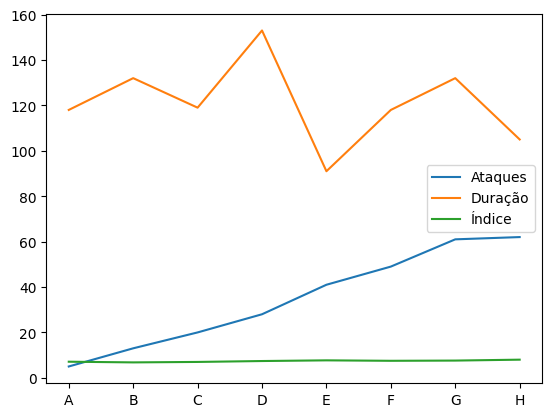

In [25]:
import pandas as pd                             # Para lidar com tabelas.
df = pd.DataFrame(dictmy,index=Esquema)
print(df)

df.plot()

<font color=blue> Suponha a seguinte situação: A equipe que fez esses testes foi trocada e a nova equipe vai fazer outros esquemas de segurança e gostaria de manter a mesma linha de atribuição de índices, para depois comparar todos os esquemas e escolher aqueles com melhores índices. 

Uma pergunta que surge é: Existe alguma relação linear entre os dados e a atribuição índices pela equipe anterior?

Supondo que exista uma relação "linear" entre os dados, da forma  
$$Índice \approx \beta_0 + \beta_1(Ataques)+\beta_2(Duracao),\tag{1}$$
em que $\approx$ denota aproximadamente. 

Precisamos determinar o vetor $\beta=[\beta_0,\beta_1,\beta_2]$. Essa relação quer dizer que os pontos estão próximos de um plano no espaço e queremos determinar a equação desse plano.

Ou ainda, podemos perguntar se todos tipos de dados são necessários, ou seja, será que há relação linear entre os dados, dois a dois?

Isso é mais fácil de vermos gráficamente:

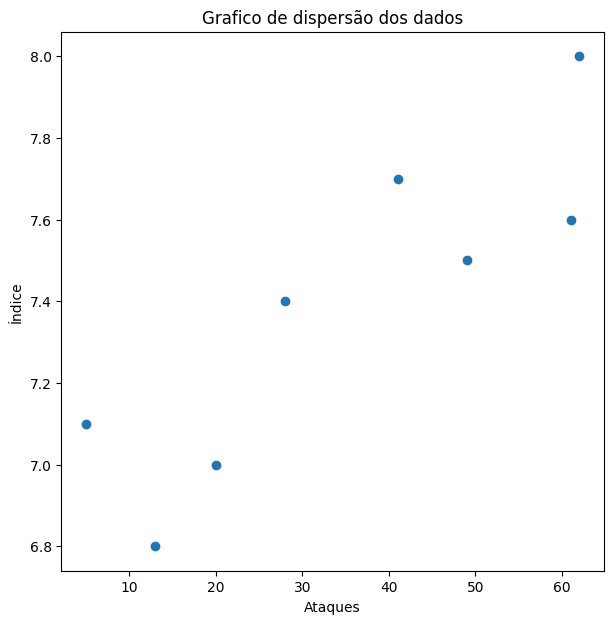

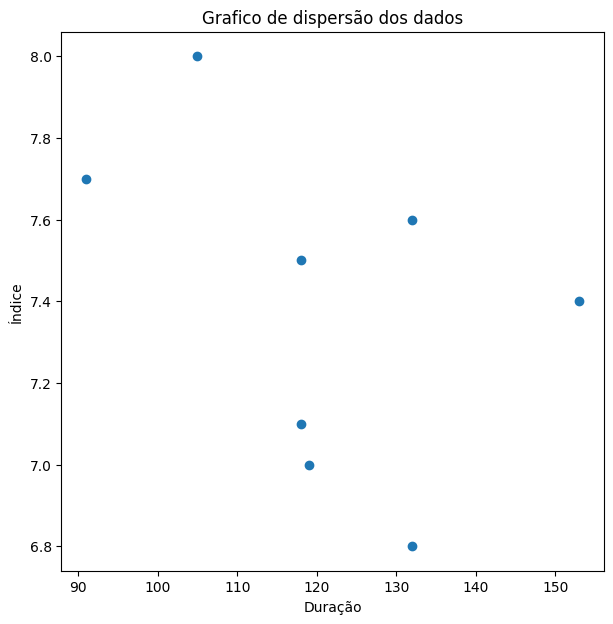

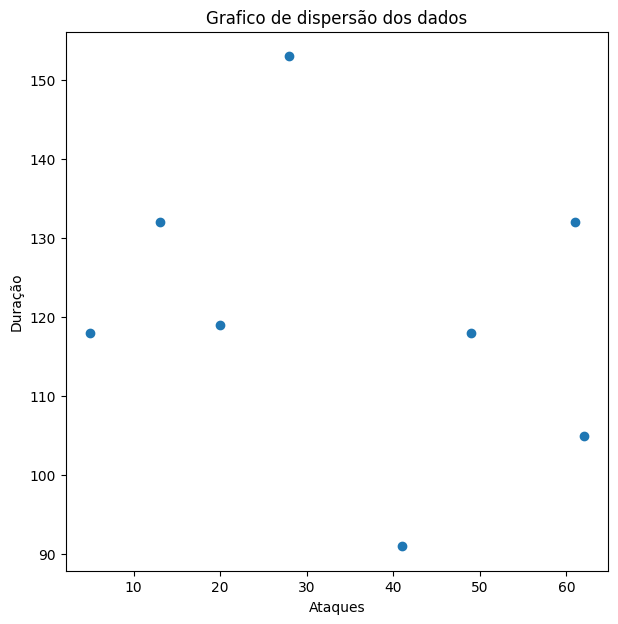

In [26]:
# Criando a figura e projeção em 3D

ax = plt.figure(figsize=(7,7))
plt.scatter(Ataques,Indice)
plt.title('Grafico de dispersão dos dados')
plt.xlabel('Ataques')
plt.ylabel('Índice')
plt.show()

# Criando a figura e projeção em 3D

ax = plt.figure(figsize=(7,7))
plt.scatter(Duracao,Indice,)
plt.title('Grafico de dispersão dos dados')
plt.xlabel('Duração')
plt.ylabel('Índice')
plt.show()

# Criando a figura e projeção em 3D

ax = plt.figure(figsize=(7,7))
plt.scatter(Ataques,Duracao)
plt.title('Grafico de dispersão dos dados')
plt.xlabel('Ataques')
plt.ylabel('Duração')
plt.show()

Os gráficos sugerem que há alguma relação entreo Índice e os ataques, mas não vemos isso em outras combinações de Índice, Ataques e Duração.

Podemos olhar o ângulo entre esses vetores, vendo-os com elementos de $\mathbb{R}^8$. Denotamos o produto interno aqui como $$h(u,v)=u\cdot v.$$

In [34]:
def h(u,v):                            # Produto interno
  u=np.array(u)
  v=np.array(v)
  return np.dot(u,v)

def ang(u,v):
  p=h(u,v)/np.sqrt(h(u,u)*h(v,v))  
  return np.arccos(p)*180/np.pi 

Então temos os ângulos (medidos em graus) entre os vetores como:

In [35]:
Ang_Ataq_Ind,Ang_Ataq_Dur,Ang_Ind_Dur=ang(Ataques,Indice),ang(Ataques,Duracao),ang(Indice,Duracao)

Ang_Ataq_Ind,Ang_Ataq_Dur, Ang_Ind_Dur

(27.708555409991874, 33.13965126670345, 9.773189484530915)

Os ângulos nos dizem que os vetores não são perpendiculares.

<font color=blue> Entretanto, vamos usar só o visual, para encurtar discussão, nesse caso:

E o visual sugere que pensemos no problem $(1)$, simplificado como:
$$y_i\approx \beta_0+\beta_1x_i,\tag{2}$$ para cada coordenada do vetor $y=Indice$ e a correspondente do vetor $x=Ataques$.

<font color=blue> Essa exepressão $(3)$ pode ser lida como escrever cada coordendad de $y$ como combinação linear da coordenada de $x$ com alguma outra coisa, no caso o $\beta_0$.

Na forma matricial temos 
$$A\beta=\begin{bmatrix}1&x\end{bmatrix}\begin{bmatrix}\beta_0\\\beta_1\end{bmatrix}=\begin{bmatrix}1&5\\ 
1&13\\ 
1&20\\ 
1&28\\ 
1&41\\ 
1&49\\ 
1&61\\ 
1&62\end{bmatrix}\begin{bmatrix}\beta_0\\\beta_1\end{bmatrix}\approx \begin{bmatrix}7.1\\6.8\\7.0\\7.4\\7.7\\7.5\\7.6\\8.0\end{bmatrix}=y,\tag{2b}$$ em que $1$ representa um vetor coluna com valores $1$, na segunda igualdade.

Vamos usar o processo de ortogonalização das colunas da matriz $A$ para a resolução.

Isso nos leva ao processo
$$\begin{cases}n_1&=& 1\, (\text{vetor com entradas iguais a 1})\\\\x&=&\beta_{21}n_1+n_2\\\\y&=&\beta_{31}n_1+\beta_{32}n_2+n_3\end{cases},\tag{GS}$$ em que $n_i$ é um vetor, $$\beta_{ij}=\begin{cases} \frac{f(v_i, n_j)}{\|n_j\|^2}&\text{ se } n_j\neq0\\0&\text{ se } n_j=0\end{cases},\quad \qquad f(n_i, n_j)= 0, \text{ se } i\neq j.$$ Ainda, $v_1=n_1$, $v_2=x$, $v_3=y$ e <font color=blue> $n_3$ será o erro cometido na aproximação $(2)$.

In [38]:
v1=np.ones(8)
v2=np.array(Ataques)
v3=np.array(Indice)

v1,v2,v3

(array([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 5, 13, 20, 28, 41, 49, 61, 62]),
 array([7.1, 6.8, 7. , 7.4, 7.7, 7.5, 7.6, 8. ]))

Definindo o coeficiente de projeção do vetor $u$ sobre o vetor $v$, como $$cproj(u,v)=\frac{u\cdot v}{\|v\|^2}:$$

In [44]:
def cproj(u,v):
  p=h(u,v)/h(v,v) 
  return p

O processo de ortogonalização fica como 

In [47]:
b21=cproj(v2,v1)
n2=v2-b21*v1
print('b21=',b21,'\n')
print('n2=',n2,'\n')
b31=cproj(v3,v1)
b32=cproj(v3,n2)
n3=v3-b31*v1-b32*n2
print('b31=',b31,'\n')
print('b32=',b32,'\n')
print('n3=',n3,'\n')

b21= 34.875 

n2= [-29.875 -21.875 -14.875  -6.875   6.125  14.125  26.125  27.125] 

b31= 7.3875 

b32= 0.016021093364695187 

n3= [ 0.19113016 -0.23703858 -0.14918624  0.12264502  0.2143708  -0.11379794
 -0.20605106  0.17792784] 



O que reforça a relação $$y\approx \beta_01+\beta_1x, \tag{2*},$$ 
porque as coordenadas de $n_3$ são muito menor que as dos vetores $x$ e $y$.

Reescrevendo $(2^*)$ temos $$\beta_0n_1+\beta_1x=y-n_3$$ ou como  $$\beta_0n_1+\beta_1x=\beta_{31}n_1+\beta_{32}n_2=\beta_{31}n_1+\beta_{32}(x-\beta_{21}n_1).$$

Isso nos dá a igualdade
$$\begin{bmatrix} 1 &-\beta_{21}\\0&1\end{bmatrix}\begin{bmatrix} \beta_{31}\\\beta_{32}\end{bmatrix}=\begin{bmatrix} \beta_{0}\\\beta_1\end{bmatrix}$$

In [41]:
beta0,beta1= np.array([[1,-b21],[0,1]])@np.array([b31,b32])
beta0,beta1

(6.828764368906255, 0.016021093364695187)

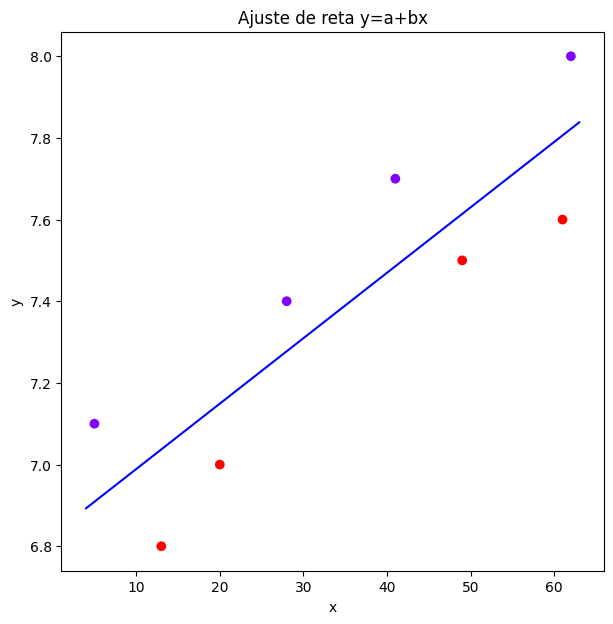

In [43]:
import matplotlib.pyplot as plt

def findicec(u): 
    x=u
    p= beta0+beta1*x
    return p
    
#---------------------------------------- Para fazer gráfico de f(x,y)
xf = np.linspace(4,63,1000)


fig = plt.figure(figsize=(7,7))
plt.plot(xf,[findicec(u) for u in xf],color='blue')
plt.scatter(Ataques,Indice,c=[0,1,1,0,0,1,1,0],cmap='rainbow')
plt.title('Ajuste de reta y=a+bx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


<font color=blue> Você pode definir outro produto interno e refazer os cálculos, se quiser obter uma reta que se ajuste mais a alguns dados de sua escolha.

**Uma solução rápida:**

Existe uma forma pronta de resolver esse problemas $(2)$ aqui no Python, com o Numpy. Para isso, usamos a versão matricial $(2b)$ o comando :

In [53]:
np.array([v1,v2])

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 5., 13., 20., 28., 41., 49., 61., 62.]])

In [54]:
A=np.transpose([v1,v2])
beta=np.linalg.lstsq(A,v3, rcond = -1)[0]             # np.linlag.lstsq(A,b) resolve o sistema linear Ax~b, ou seja, determina o vetor x, tal que Ax-b tem o menor múdulo possível.
print(f'[beta1,beta2]={beta}')

[beta1,beta2]=[6.82876437 0.01602109]
